## 앙상블 모델과 단일 모델 성능 비교 <hr>
- 데이터 : sklearn.datasets의 breast_cancer
- 유형 : 지도학습 + 분류
- 방법 : LogisticRegression, DecisionTree, RandomForest

### [1] 모듈 로딩 및 데이터 준비 <hr>

In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(as_frame=True, return_X_y=True)
X.shape, y.shape
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=5)

### [2] 학습 진행 <hr>

#### [2-1] 선형회귀 LinearRegression

In [33]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

#### [2-2] 의사결정나무 DecisionTreeClassfier

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### [2-3] Ensemble 알고리즘 기반 분류

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=5, oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=5)

- 3개 알고리즘 모델에 대한 성능 평가

In [36]:
print(f'[LogisticRegression]     Train : {lr_model.score(X_train,y_train):5.3f}, Test : {lr_model.score(X_test,y_test):5.3f}')
print(f'[DecisionTreeClassifier] Train : {dt_model.score(X_train,y_train):5.3f}, Test : {dt_model.score(X_test,y_test):5.3f}')
print(f'[RandomForestClassifier] Train : {rf_model.score(X_train,y_train):5.3f}, Test : {rf_model.score(X_test,y_test):5.3f}')

[LogisticRegression]     Train : 0.958, Test : 0.965
[DecisionTreeClassifier] Train : 1.000, Test : 0.895
[RandomForestClassifier] Train : 1.000, Test : 0.965


In [43]:
featuresDF = pd.DataFrame([rf_model.feature_names_in_, rf_model.feature_importances_])
featuresDF = featuresDF.T
featuresDF.set_index(0, inplace=True)
featuresDF.sort_values(by=1,ascending=False, inplace=True)


<Axes: ylabel='0'>

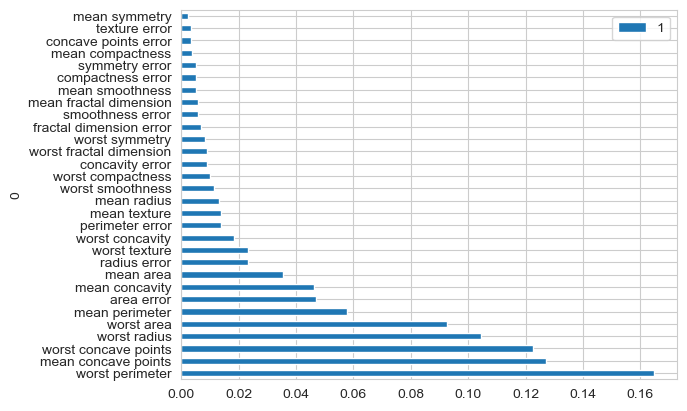

In [50]:
featuresDF.plot(kind='barh')

In [ ]:
featuresDF.plot